In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer

In [7]:
c = 3
data = getMulticlassData('6-1.wav', 0, c) + getMulticlassData('3-1.wav',1,c) + getMulticlassData('4-1.wav',2,c) #+ getMulticlassData('1-1.wav', 3, c) + getMulticlassData('5-1.wav',4,c)
# data = getData('6-1.wav', -1) + getData('1-1.wav', 1)
print len(data)


Reading file 6-1.wav
Sample split into 963 windows of length 1323
Frequencies range from 0.000000 to 21966.666667
Mel frequencies range from 0.000000 to 3912.266656

Building filters...
Applying filters...
Applying cosine transform...
MFCC complete!

Calculating deltas...
Deltas complete!

Scaling...
Scaling complete!

Merging...
Finished merging!

Reading file 3-1.wav
Sample split into 1285 windows of length 1323
Frequencies range from 0.000000 to 21966.666667
Mel frequencies range from 0.000000 to 3912.266656

Building filters...
Applying filters...
Applying cosine transform...
MFCC complete!

Calculating deltas...
Deltas complete!

Scaling...
Scaling complete!

Merging...
Finished merging!

Reading file 4-1.wav
Sample split into 806 windows of length 1323
Frequencies range from 0.000000 to 21966.666667
Mel frequencies range from 0.000000 to 3912.266656

Building filters...
Applying filters...
Applying cosine transform...
MFCC complete!

Calculating deltas...
Deltas complete!

Scali

In [8]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 0: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(3042, 305)


In [ ]:
# NTN = ShallowNeuralNetwork(hidden_dim=27)#input_dim=26, hidden_dim=13)
# cProfile.run('NTN.train(trainset, maxiter=61, alpha=0.0001, display_progress=True)')

In [5]:
# 2-class, alpha=.0001, lmbda=0, t=61
# print NTN.accuracy(trainset), NTN.accuracy(testset)

0.99433106576 0.801020408163


In [27]:
SNN = SoftmaxNeuralNetwork(output_dim=c)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# SNN.backward_propagation(data[0][1])
cProfile.run('SNN.train(trainset, maxiter=101, alpha=0.001, lmbda=.0, display_progress=True)')

completed iteration 0; error is 1798.0; size is 8.63502333686
completed iteration 10; error is 1324.0; size is 58.6429534608
completed iteration 20; error is 934.0; size is 87.4781530662
completed iteration 30; error is 675.0; size is 111.05880713
completed iteration 40; error is 441.0; size is 130.198387697
completed iteration 50; error is 402.0; size is 147.337222856
completed iteration 60; error is 313.0; size is 160.27502457
completed iteration 70; error is 254.0; size is 171.819059617
completed iteration 80; error is 202.0; size is 181.718910978
completed iteration 90; error is 220.0; size is 190.516968067
completed iteration 100; error is 163.0; size is 197.538320897
         9401337 function calls in 43.695 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   43.695   43.695 <string>:1(<module>)
   276437    0.575    0.000    0.575    0.000 SNN.py:11(<lambda>)
   276437    2.624    0.000    6

In [28]:
# 3-class, alpha=.001, lmbda=.00001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.93313847278 0.544262295082


In [18]:
# 5-class, alpha=.002, lmbda=.0001, t=401
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.844714897453 0.403651115619


In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

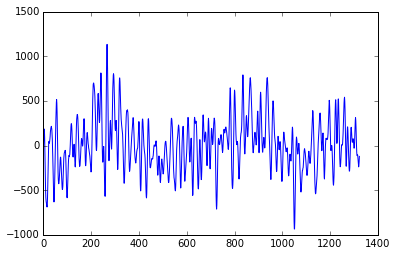

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()